<a href="https://colab.research.google.com/github/Ihechineme/Ihechineme/blob/main/Analysis_of_a_Hotel_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tech4Dev Month 3 Project**

# **BY**

# **Team 16**

# **Hotel Dataset**
Overview: This dataset comprises of booking data from a company that handles hotel bookings from various countries. The data spans 10 years from 2010-2020 and contains data such as booking price, date, origin country, discount, profit margin, e.t.c

# **Problem Statement**
The company wants insight on how to improve advertising strategies and maximise profits. They also want an indept analysis of every aspect of their operations and possible underlying problems.

# **Analysis Questions**


1.   Age distribution of the dataset
2.   Countries with the highest client base
3.   Preferred payment method (overall and in different countries)
4.   Booking trends
    - Highest booking season
    - Most profitable year
5. Factors affecting discount
6. Factors affecting booking price
7. Do customers book days before their actual check-in date?
8. Factors affecting profit margin
9. Did number of bookings increase over the past 10 years?
10. Did profit increase?
11. Did patronage decrease from any country?         



In [ ]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Hotel Dataset.xlsx')
df

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Location,Destination Country,...,Check-Out Date,Rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Booking Price[SGD],Discount,GST,Profit Margin
0,DDMY00001,2010-01-01,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,...,2010-01-20,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,0.01,0.07,0.25
1,DDID00002,2010-01-01,09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,Colombia,...,2010-01-22,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0.00,0.07,0.24
2,DDSG00003,2010-01-01,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,Germany,...,2010-01-09,2,Seacoast Hotel,4.5,Credit Card,Grab,338,0.19,0.07,0.20
3,DDSG00004,2010-01-01,13:44:40,SG00002,Male,28,Singapore,North,Yishun,Canada,...,2010-02-19,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,0.19,0.07,0.13
4,DDKH00005,2010-01-01,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,Kenya,...,2010-01-06,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,0.15,0.07,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66536,DDSG66531,2019-12-31,23:36:16,SG12034,Female,42,Singapore,Central,Orchard,Germany,...,2020-01-10,2,Silver Cloud Inn,4.3,Wallet,Grab,182,0.23,0.07,0.24
66537,DDSG66532,2019-12-31,14:41:01,SG12035,Female,54,Singapore,Central,Geylang,Israel,...,2020-04-13,2,The Elet,4.2,COD,DBS Paylah,125,0.06,0.07,0.19
66538,DDSG66533,2019-12-31,19:11:16,SG12036,Female,57,Singapore,Central,Downtown Core,Canada,...,2020-01-10,4,The Elet,4.4,Debit Card,EZ-Link,318,0.02,0.07,0.22
66539,DDTH66534,2019-12-31,05:12:29,TH12170,Female,44,Thailand,Surat Thani,Ko Samui,Maldives,...,2020-01-02,2,Sunset Lodge,4.2,Debit Card,HSBC,173,0.14,0.07,0.25


# **Understanding the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66541 entries, 0 to 66540
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Booking ID           66541 non-null  object        
 1   Date of Booking      66541 non-null  datetime64[ns]
 2   Time                 66541 non-null  object        
 3   Customer ID          66541 non-null  object        
 4   Gender               66541 non-null  object        
 5   Age                  66541 non-null  int64         
 6   Origin Country       66541 non-null  object        
 7   State                66541 non-null  object        
 8   Location             66541 non-null  object        
 9   Destination Country  66541 non-null  object        
 10  Destination City     66541 non-null  object        
 11  No. Of People        66541 non-null  int64         
 12  Check-in date        66541 non-null  datetime64[ns]
 13  No of Days           66541 non-

In [ ]:
df.isnull().sum()

Booking ID             0
Date of Booking        0
Time                   0
Customer ID            0
Gender                 0
Age                    0
Origin Country         0
State                  0
Location               0
Destination Country    0
Destination City       0
No. Of People          0
Check-in date          0
No of Days             0
Check-Out Date         0
Rooms                  0
Hotel Name             0
Hotel Rating           0
Payment Mode           0
Bank Name              0
Booking Price[SGD]     0
Discount               0
GST                    0
Profit Margin          0
dtype: int64

In [ ]:
df.describe()

,Age,No. Of People,No of Days,Rooms,Hotel Rating,Booking Price[SGD],Discount,GST,Profit Margin
count,66541.000000,66541.000000,66541.000000,66541.000000,66541.000000,66541.000000,66541.000000,6.654100e+04,66541.000000
mean,38.436182,3.995777,3.233766,2.283344,4.288500,214.046783,0.125470,7.000000e-02,0.188817
std,11.557562,2.000074,3.377854,1.031134,0.275516,108.126184,0.075113,4.163368e-17,0.052765
min,-5.000000,1.000000,1.000000,1.000000,3.300000,35.000000,0.000000,7.000000e-02,0.100000
25%,28.000000,2.000000,1.000000,1.000000,4.200000,125.000000,0.060000,7.000000e-02,0.140000
50%,38.000000,4.000000,2.000000,2.000000,4.300000,199.000000,0.130000,7.000000e-02,0.200000
75%,48.000000,6.000000,4.000000,3.000000,4.500000,293.000000,0.190000,7.000000e-02,0.230000
max,58.000000,7.000000,97.000000,4.000000,4.700000,578.000000,0.250000,7.000000e-02,0.300000


Prepare data for exploration.

Split datetime columns into year, month and day for easy exploration.

In [ ]:
df.columns

Index(['Booking ID', 'Date of Booking', 'Time', 'Customer ID', 'Gender', 'Age',
       'Origin Country', 'State', 'Location', 'Destination Country',
       'Destination City', 'No. Of People', 'Check-in date', 'No of Days',
       'Check-Out Date', 'Rooms', 'Hotel Name', 'Hotel Rating', 'Payment Mode',
       'Bank Name', 'Booking Price[SGD]', 'Discount', 'GST', 'Profit Margin'],
      dtype='object')

In [ ]:
# Splitting the datetime column into year, month, and day columns
df['Booking year'] = df['Date of Booking'].dt.year
df['Booking month'] = df['Date of Booking'].dt.month
df['Booking day'] = df['Date of Booking'].dt.day
df

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Location,Destination Country,...,Hotel Rating,Payment Mode,Bank Name,Booking Price[SGD],Discount,GST,Profit Margin,Booking year,Booking month,Booking day
0,DDMY00001,2010-01-01,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,...,4.3,Wallet,United Overseas Bank (UOB),243,0.01,0.07,0.25,2010,1,1
1,DDID00002,2010-01-01,09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,Colombia,...,4.2,Wallet,EZ-Link,312,0.00,0.07,0.24,2010,1,1
2,DDSG00003,2010-01-01,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,Germany,...,4.5,Credit Card,Grab,338,0.19,0.07,0.20,2010,1,1
3,DDSG00004,2010-01-01,13:44:40,SG00002,Male,28,Singapore,North,Yishun,Canada,...,4.2,Debit Card,DBS Paylah,254,0.19,0.07,0.13,2010,1,1
4,DDKH00005,2010-01-01,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,Kenya,...,4.6,Wallet,Bank of Singapore (BOS),313,0.15,0.07,0.17,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66536,DDSG66531,2019-12-31,23:36:16,SG12034,Female,42,Singapore,Central,Orchard,Germany,...,4.3,Wallet,Grab,182,0.23,0.07,0.24,2019,12,31
66537,DDSG66532,2019-12-31,14:41:01,SG12035,Female,54,Singapore,Central,Geylang,Israel,...,4.2,COD,DBS Paylah,125,0.06,0.07,0.19,2019,12,31
66538,DDSG66533,2019-12-31,19:11:16,SG12036,Female,57,Singapore,Central,Downtown Core,Canada,...,4.4,Debit Card,EZ-Link,318,0.02,0.07,0.22,2019,12,31
66539,DDTH66534,2019-12-31,05:12:29,TH12170,Female,44,Thailand,Surat Thani,Ko Samui,Maldives,...,4.2,Debit Card,HSBC,173,0.14,0.07,0.25,2019,12,31


In [ ]:
df['Checkin year'] = df['Check-in date'].dt.year
df['Checkin month'] = df['Check-in date'].dt.month
df['Checkin day'] = df['Check-in date'].dt.day
df

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Location,Destination Country,...,Booking Price[SGD],Discount,GST,Profit Margin,Booking year,Booking month,Booking day,Checkin year,Checkin month,Checkin day
0,DDMY00001,2010-01-01,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,...,243,0.01,0.07,0.25,2010,1,1,2010,1,12
1,DDID00002,2010-01-01,09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,Colombia,...,312,0.00,0.07,0.24,2010,1,1,2010,1,21
2,DDSG00003,2010-01-01,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,Germany,...,338,0.19,0.07,0.20,2010,1,1,2010,1,2
3,DDSG00004,2010-01-01,13:44:40,SG00002,Male,28,Singapore,North,Yishun,Canada,...,254,0.19,0.07,0.13,2010,1,1,2010,2,15
4,DDKH00005,2010-01-01,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,Kenya,...,313,0.15,0.07,0.17,2010,1,1,2010,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66536,DDSG66531,2019-12-31,23:36:16,SG12034,Female,42,Singapore,Central,Orchard,Germany,...,182,0.23,0.07,0.24,2019,12,31,2020,1,6
66537,DDSG66532,2019-12-31,14:41:01,SG12035,Female,54,Singapore,Central,Geylang,Israel,...,125,0.06,0.07,0.19,2019,12,31,2020,4,9
66538,DDSG66533,2019-12-31,19:11:16,SG12036,Female,57,Singapore,Central,Downtown Core,Canada,...,318,0.02,0.07,0.22,2019,12,31,2020,1,9
66539,DDTH66534,2019-12-31,05:12:29,TH12170,Female,44,Thailand,Surat Thani,Ko Samui,Maldives,...,173,0.14,0.07,0.25,2019,12,31,2020,1,1


# **Data Exploration**

# **Customer Analysis**

In this section, we define the customer base of the company. Some of the things looked at are; age distribution, preferred payment mode, most popular country (origin and destination)

In [ ]:
#Average age of the customer
df['Age'].mean()

38.43618220345351

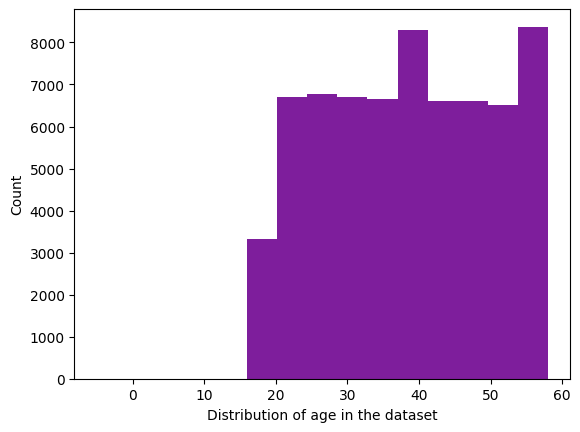

In [ ]:
#Age distribution in the dataset

plt.hist(df['Age'], bins=15, color='#7E1E9C')
plt.xlabel('Distribution of age in the dataset')
plt.ylabel('Count')
plt.show()

Age Distribution of the dataset: Age range of of the customers are aged from 18-58. The majority however are between 35-40 and 55-58 years of age.

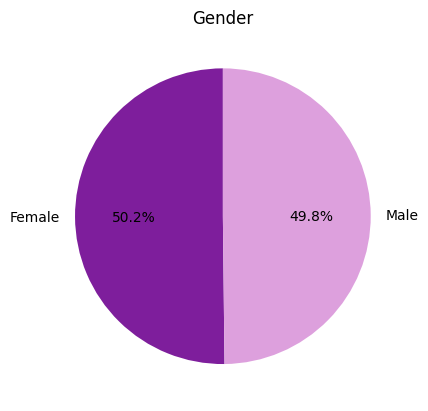

In [ ]:
values = df['Gender'].value_counts()

plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=['#7E1E9C', '#DDA0DD'])
plt.title('Gender')
plt.show()

Gender: Males are slightly more than females in the dataset.

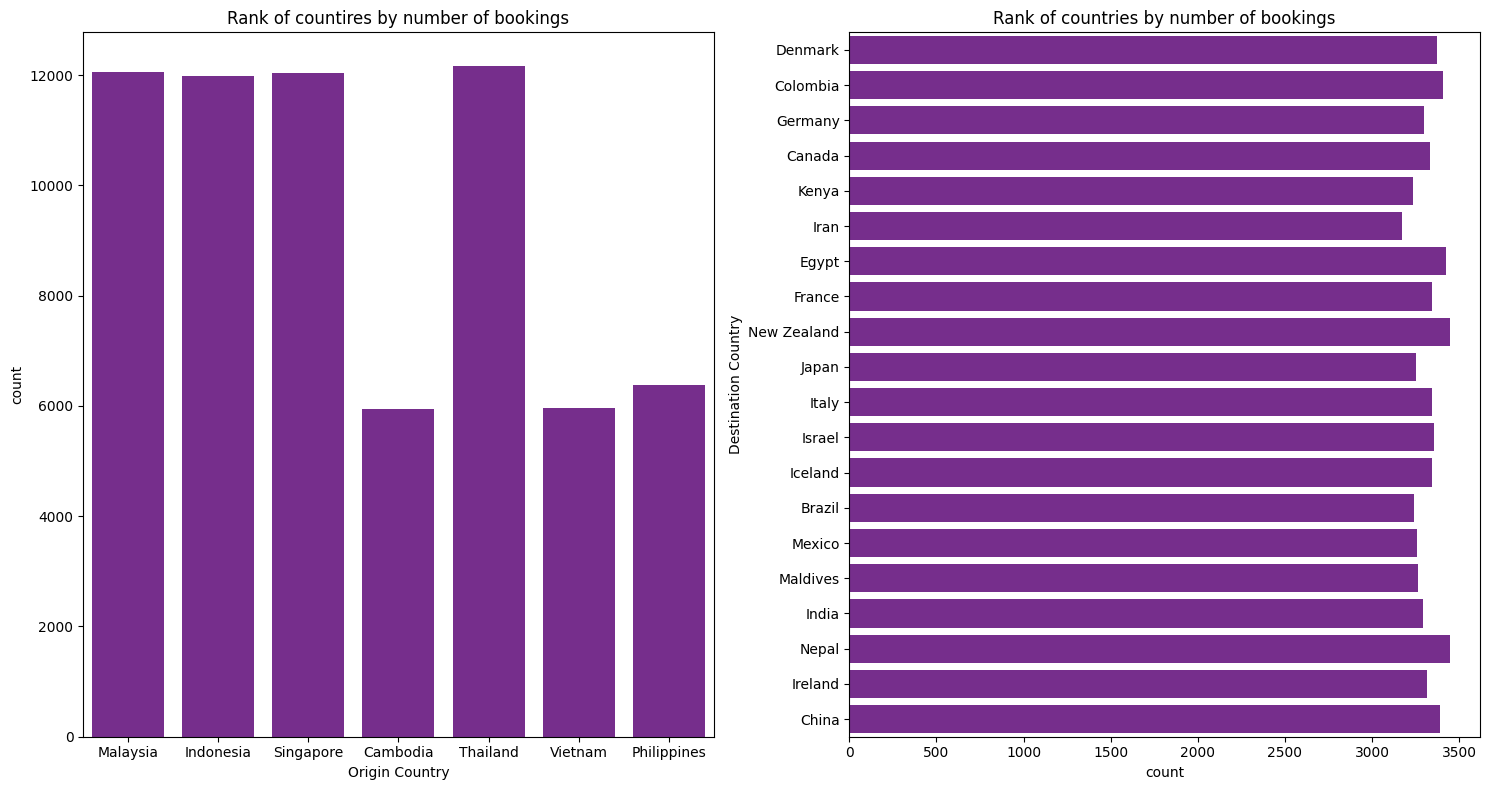

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

sns.countplot(x=df['Origin Country'], color='#7E1E9C', ax=axs[0])
axs[0].set_title('Rank of countires by number of bookings')

sns.countplot(y=df['Destination Country'], color='#7E1E9C', ax=axs[1])
axs[1].set_title('Rank of countries by number of bookings')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

Highest customer base by country: Malaysia, Indonesia, Singapore and Thailand take up a huge chunk of the customer base with Thailand and Malaysia been slightly higher. In terms of destination country, it can be seen from the chart that the destination countries have almost the same number of people travelling ther. However, it can still be seen that Egypt, New Zealand and Nepal had a slightly higher amount of travellers than other countries.

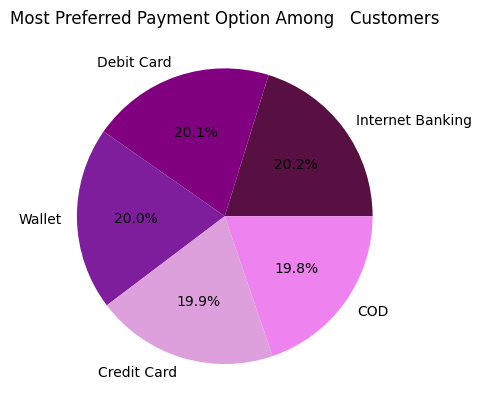

In [ ]:
values = df['Payment Mode'].value_counts()

plt.pie(values, labels=values.index, autopct='%1.1f%%', colors=['#580F41', '#800080', '#7E1E9C', '#DDA0DD', '#EE82EE'])
plt.title('Most Preferred Payment Option Among   Customers')
plt.show()

Preferred Payment Mode: The preferred payment option among customers is internet banking by a very small margin. Looking at the chart, it safe to say that they are all equally liked by customers as the percentages are very close to each other.

In [ ]:
df.columns

Index(['Booking ID', 'Date of Booking', 'Time', 'Customer ID', 'Gender', 'Age',
       'Origin Country', 'State', 'Location', 'Destination Country',
       'Destination City', 'No. Of People', 'Check-in date', 'No of Days',
       'Check-Out Date', 'Rooms', 'Hotel Name', 'Hotel Rating', 'Payment Mode',
       'Bank Name', 'Booking Price[SGD]', 'Discount', 'GST', 'Profit Margin',
       'Booking year', 'Booking month', 'Booking day', 'Checkin year',
       'Checkin month', 'Checkin day'],
      dtype='object')

Text(0.5, 1.0, 'Preferred Payment Mode in Different Countries')

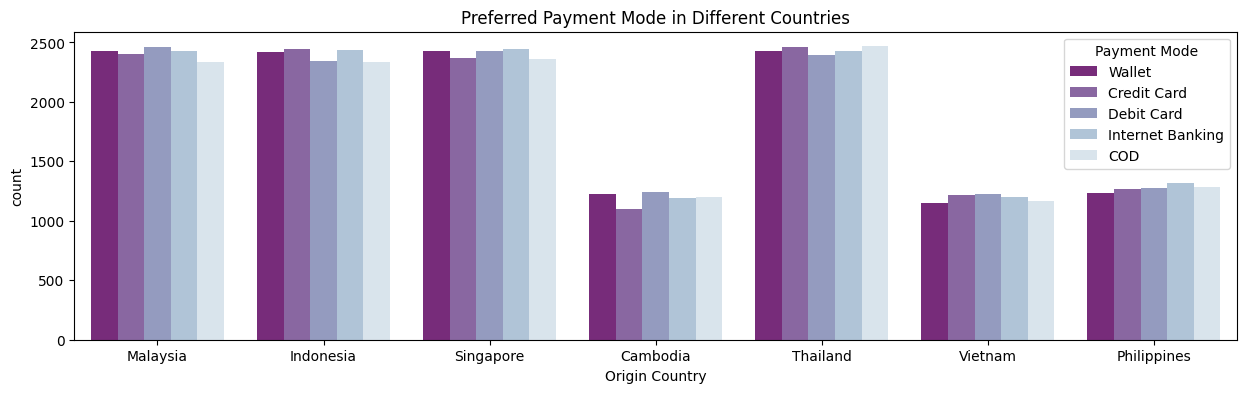

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(x=df['Origin Country'], hue=df['Payment Mode'], palette='BuPu_r')
plt.title('Preferred Payment Mode in Different Countries')

Preferred Payment Mode in Different Countries: Same as before, there isn't a significant diffrence in the payment modes for different countries. While some countries do have a populay payment method that is diffrent from the others, the difference between them isn't substantial.

# **Booking Analysis**

In this section, we analyse the behaviour of our defined customer base during booking. Insights we intend to derive from here include;
- preferred number of rooms (overall and for different countries)
- are highly rated hotels booked more?
- effect of discount on number of rooms booked.  

In [ ]:
df['Rooms'].unique()

array([1, 2, 3, 4])

Text(0.5, 1.0, 'Most commonly booked number of rooms')

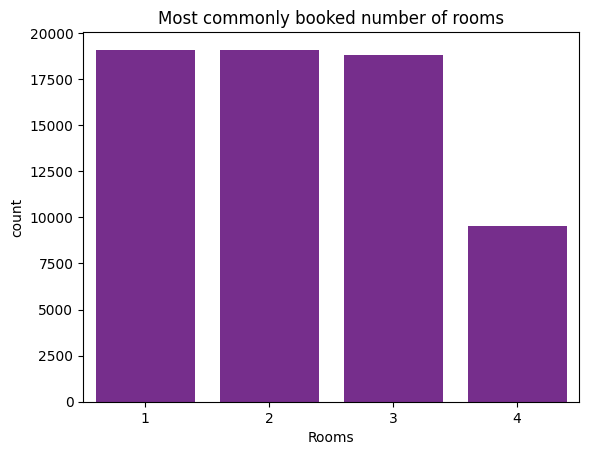

In [ ]:
sns.countplot(x=df['Rooms'], color='#7E1E9C')
plt.title('Most commonly booked number of rooms')

From the chart above, it can be seen that most of the customers booked 1-3 rooms. In another chart which we have chosen not to add, we saw that the number of rooms booked actually depended greatly on the number of people traveling together.

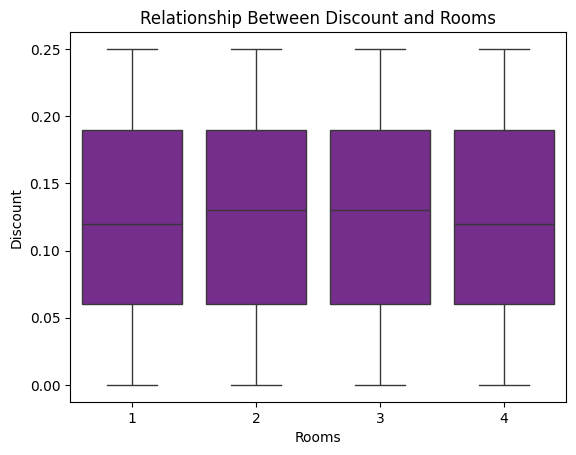

In [ ]:
sns.boxplot(x=df['Rooms'], y=df['Discount'], color='#7E1E9C')

plt.xlabel('Rooms')
plt.ylabel('Discount')
plt.title('Relationship Between Discount and Rooms')

plt.show()

Relationship between discount and number of rooms: The purpose of this chart was to find out if a higher discount was given to customers when they booked more rooms. It is important to know this because it can inform the company's decision on whether to include higher discount on higher number of rooms in order to entice people into booking more.
From the box plot, we were able to deduce that for 2-3 rooms, a higher amount of the discount was less than the median. The opposite is the case however for a single room and four rooms. It can also be seen that 50% of the discount lie within 0.06 to 0.19.
From the chart, it was assumed that the company gave more discount on single rooms as it was the highest booked room and 4 rooms to entice people to book a higher number of rooms.  

Text(0.5, 1.0, 'Most booked hotels according to rating')

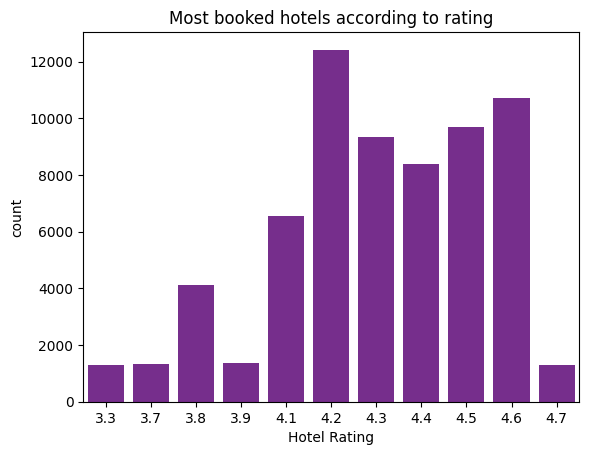

In [ ]:
sns.countplot(x=df['Hotel Rating'], color='#7E1E9C')
plt.title('Most booked hotels according to rating')

From the chart above, we can see that highly rated hotels are booked more with the exception of hotels rated 4.7 and above. It could be that these hotels are more expensive which leads to the low patronage. We will certify this assumption later when we compare hotel ratings with their prices.

Text(0.5, 1.0, 'Most booked rooms according to country')

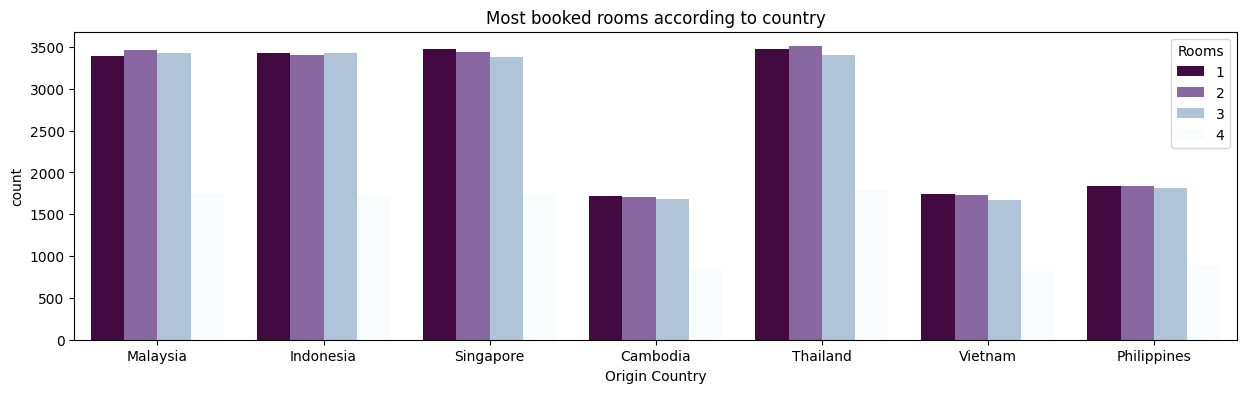

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(x=df['Origin Country'], hue=df['Rooms'], palette='BuPu_r')
plt.title('Most booked rooms according to country')

It can be seen that the origin country has no effect on the number of rooms booked.

Overall from our booking analysis,the following conclusions were made;

- the primary factor affecting the number of rooms booked is the number of people in the travelling party.
- highly rated hotels get more bookings from customers.
- there is higher discount on higher number of rooms.          

# **Financial Analysis**

In this section, the company's finances are analysed. Insights to be derived here include:
- factors affecting booking price
- factors affecting profit margin

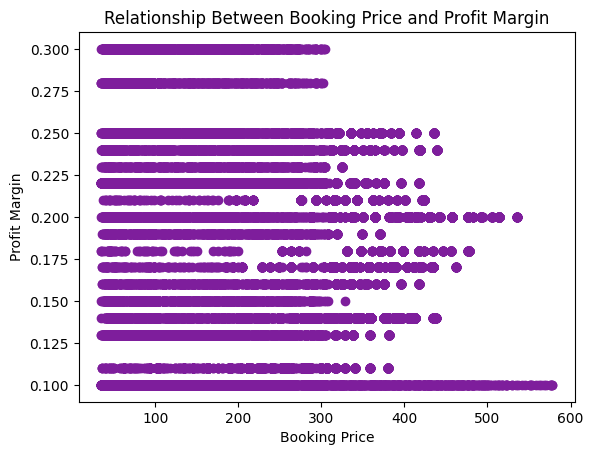

In [ ]:
plt.scatter(df['Booking Price[SGD]'], df['Profit Margin'], color='#7E1E9C')

plt.xlabel('Booking Price')
plt.ylabel('Profit Margin')
plt.title('Relationship Between Booking Price and Profit Margin')

plt.show()

Relationship Between Profit Margin and Booking Price: From the chart, we saw that a higher booking price doesn't necessarily translate to a higher profit margin. We can also see that the bulk of the clients go for rooms between 100-400(SGD).

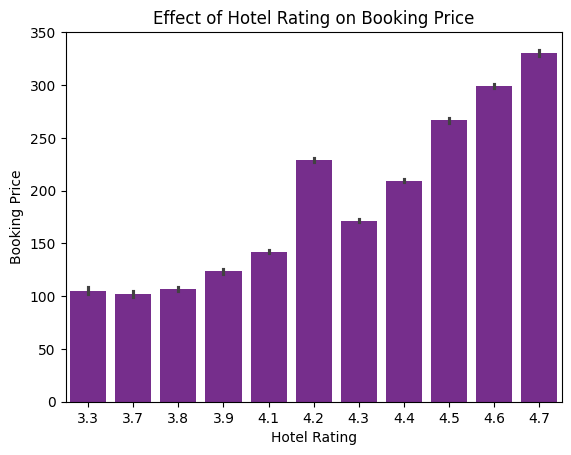

In [ ]:
sns.barplot(x=df['Hotel Rating'], y=df['Booking Price[SGD]'], data=df, color='#7E1E9C')

plt.xlabel('Hotel Rating')
plt.ylabel('Booking Price')
plt.title('Effect of Hotel Rating on Booking Price')

plt.show()

Relationship between Booking Price and Hotel Rating: From the chart, we can see that highly rated hotels are more highly priced. However, there is an exception in the case of hotels rated 4.2. We can see that these hotels are higly priced than those rated 4.3 and 4.4. In our booking analysis, we found that hotels rated 4.2 had the highest number of bookings. This could be the reason for the higher pricing.  

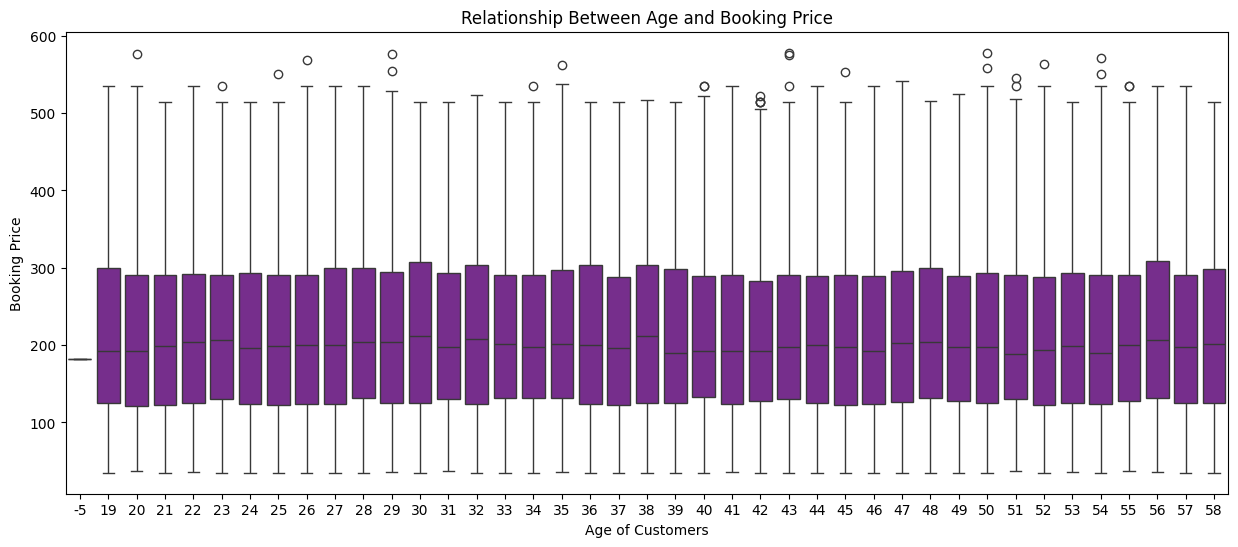

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Age'], y=df['Booking Price[SGD]'], color='#7E1E9C')

plt.xlabel('Age of Customers')
plt.ylabel('Booking Price')
plt.title('Relationship Between Age and Booking Price')

plt.show()

In this visualisation, we wanted to check if age has any effect on the price of rooms booked. The question was, did a certain age book more expensive rooms? From the chart, there isn't a strong correlation between age and booking price.There wasn't a particular age group that booked more expensive rooms and most age groups booked in a similar manner with a few exceptions (outliers).

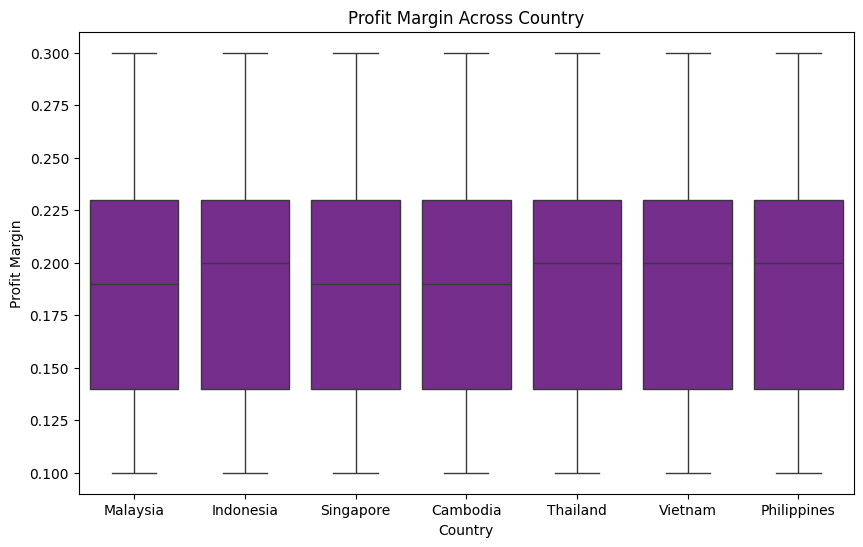

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Origin Country', y='Profit Margin', data=df, color='#7E1E9C')
plt.title('Profit Margin Across Country')
plt.xlabel('Country')
plt.ylabel('Profit Margin')
plt.show()

From the chart, we can see that most of the countries had a profit margin that was less than the median value. It simply means that the profit margins are largely on the lower side in these countries.

# **Time Series Analysis**

In this section, we analyse trends in booking, profit and other time related data over the past 10 years. Insights to be derived include:

- Most profitable season
- customer behaviour when booking? Do they book earlier than their travel dates?
- How is the company doing in terms of profits? Is it increasing or decreasing?

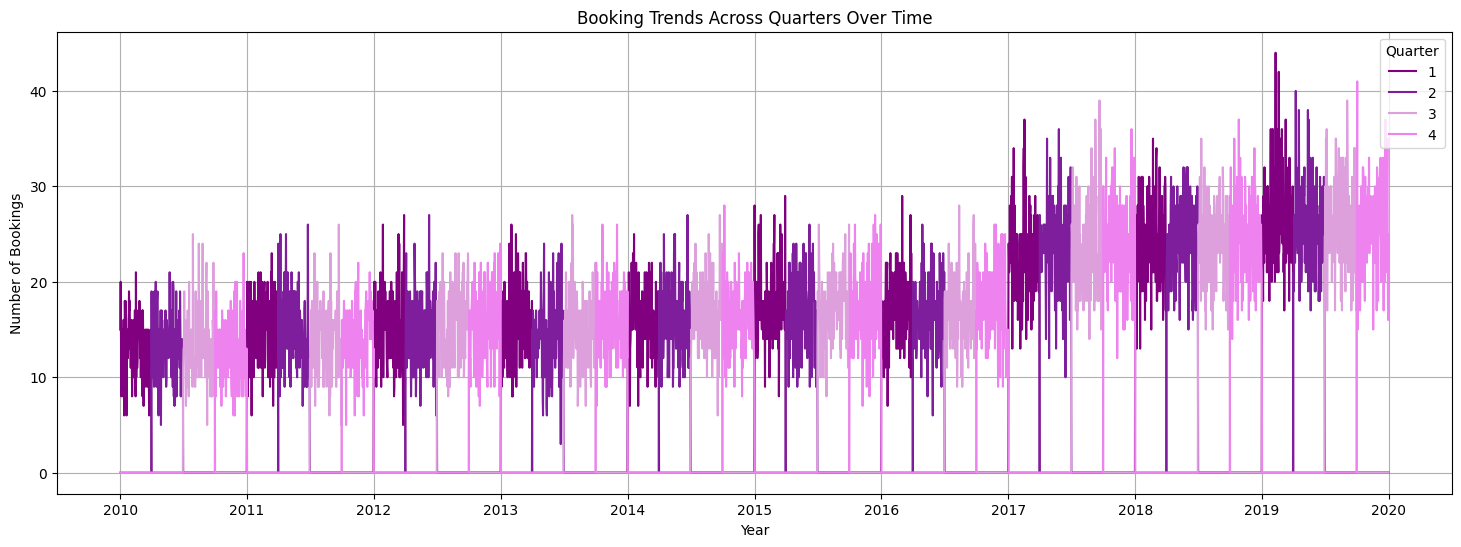

In [ ]:
df['Quarter'] = df['Date of Booking'].dt.quarter

# Group by year and quarter, count bookings
quarterly_data = df.groupby(['Date of Booking', 'Quarter']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(18, 6))

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
colors = ['#800080', '#7E1E9C', '#DDA0DD', '#EE82EE']
markers = ['o', 's', 'D', '^']

for i, quarter in enumerate(quarterly_data.columns):
    plt.plot(quarterly_data.index, quarterly_data[quarter], label=quarter, color=colors[i])

plt.title('Booking Trends Across Quarters Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.legend(title='Quarter', loc='upper right')
plt.grid(True)
plt.show()

For this chart, we wanted to see which quarters in the year had the highest amount of business.

It can be seen that quarter one, quarter two and quarter 3 have the highest amount of bookings over the years with bookings increasing in quarter one in the past five years to make it number one.

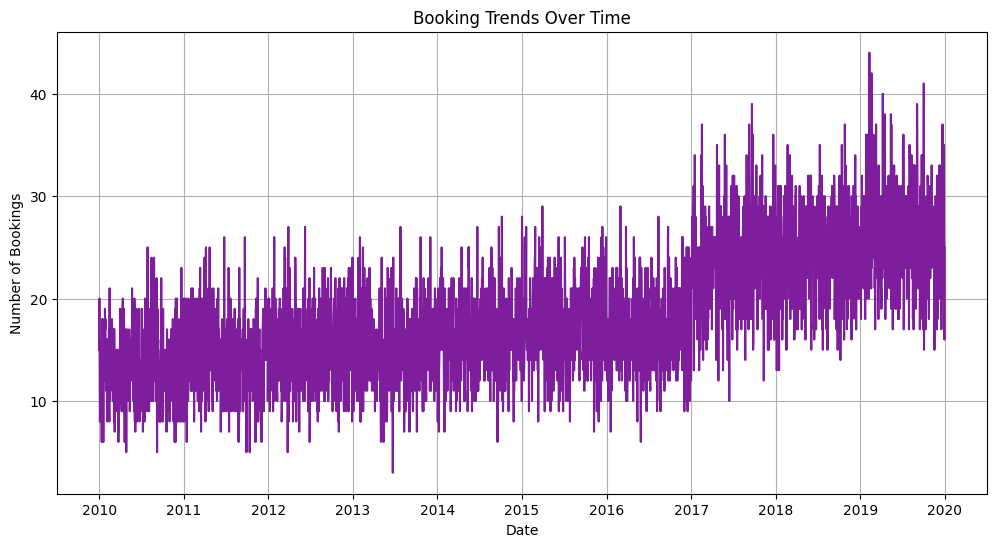

In [ ]:
# Group by date, count bookings
daily_booking_counts = df.groupby('Date of Booking').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_booking_counts.index, daily_booking_counts.values, color='#7E1E9C', linestyle='-')
plt.title('Booking Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

The above chart is similar to the previous one. For this chart, we just wanted to see how booking has gone over the years. In the past 10 years, number of bookings has gone up yearly only decreasing slightly in 2015 and 2016 before experiencing a major boom in bookings in 2017.


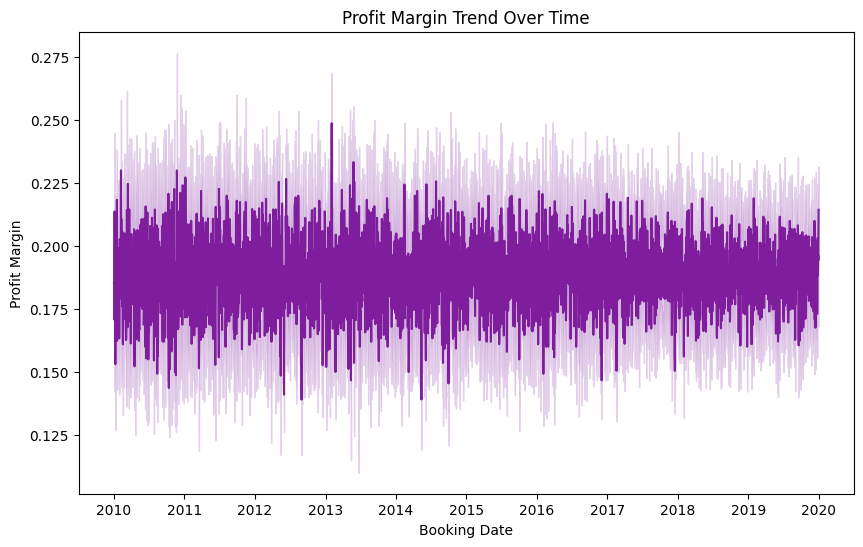

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date of Booking', y='Profit Margin', data=df, color='#7E1E9C')
plt.title('Profit Margin Trend Over Time')
plt.xlabel('Booking Date')
plt.ylabel('Profit Margin')
plt.show()

From the chart, it can be seen that profit margin over the years has decreased despite there been an increase in the number of bookings. This could be as a result of inflation or rising cost of running the business.

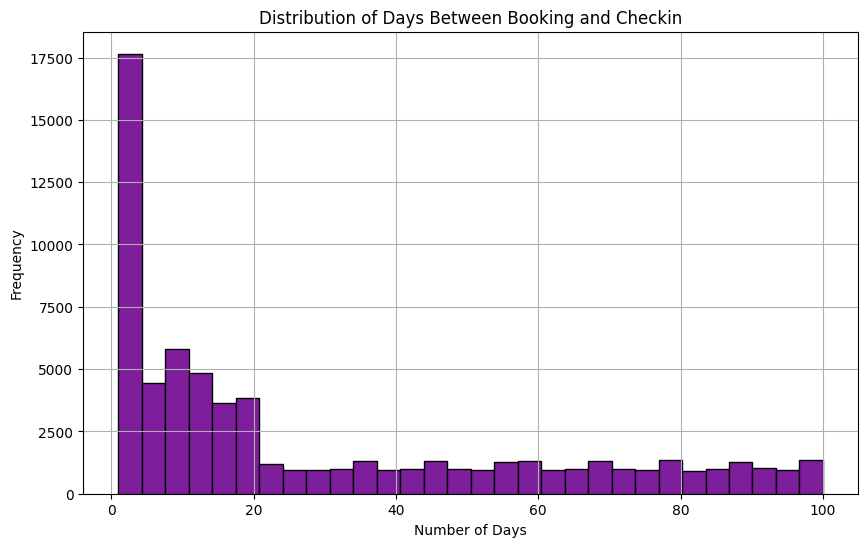

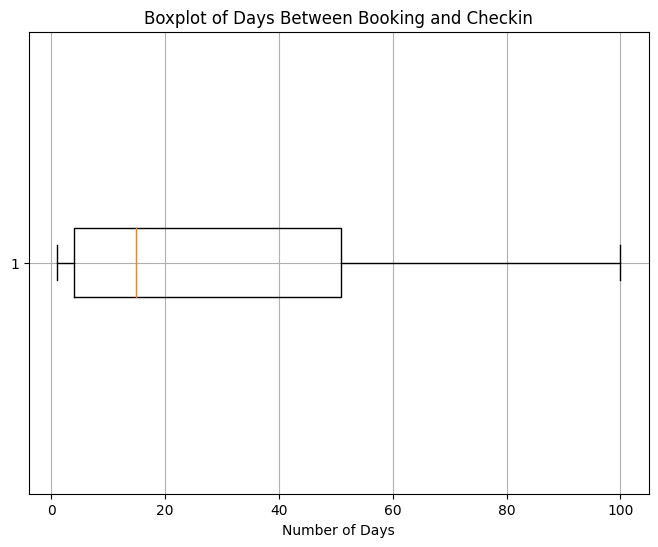

In [ ]:
# Calculate the number of days between booking date and check-in date
df['Days Between Booking and Checkin'] = (df['Check-in date'] - df['Date of Booking']).dt.days

# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Days Between Booking and Checkin'], bins=30, color='#7E1E9C', edgecolor='black')
plt.title('Distribution of Days Between Booking and Checkin')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Days Between Booking and Checkin'], vert=False)
plt.title('Boxplot of Days Between Booking and Checkin')
plt.xlabel('Number of Days')
plt.grid(True)
plt.show()

The intent of this charge was to see if customers liked to book way before their travel dates. It can help in crafting advertising strategies. It can be seen that a higher number of the customers book for hotels between 1-21 days of travel. The spread is better seen in the boxplot above.

<Axes: xlabel='Booking year', ylabel='count'>

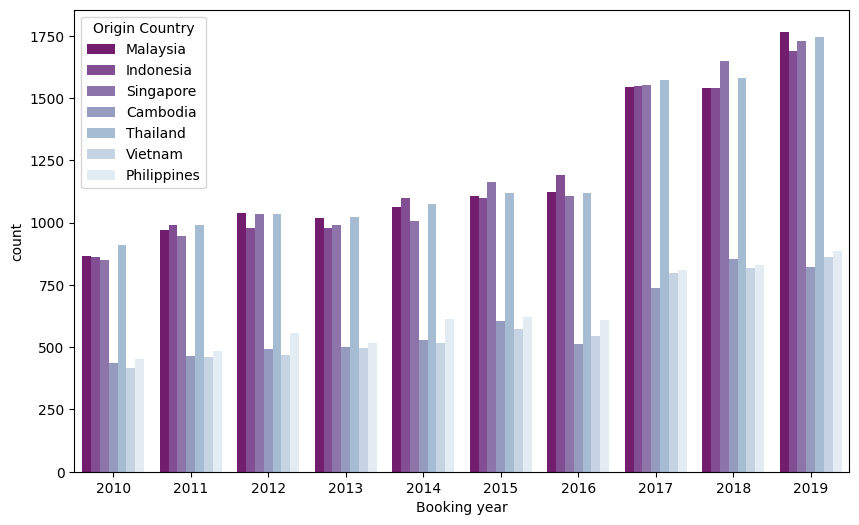

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Booking year'], hue=df['Origin Country'], data=df, palette='BuPu_r')

The purpose of this chart is to check if patronage reduced in any country and possibly find out the cause. It is obvious that bboking increased in every country over the years with the exception of Cambodia. There was a slight decrease in bookings in 2019.

<ipython-input-31-3a5eda778923>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


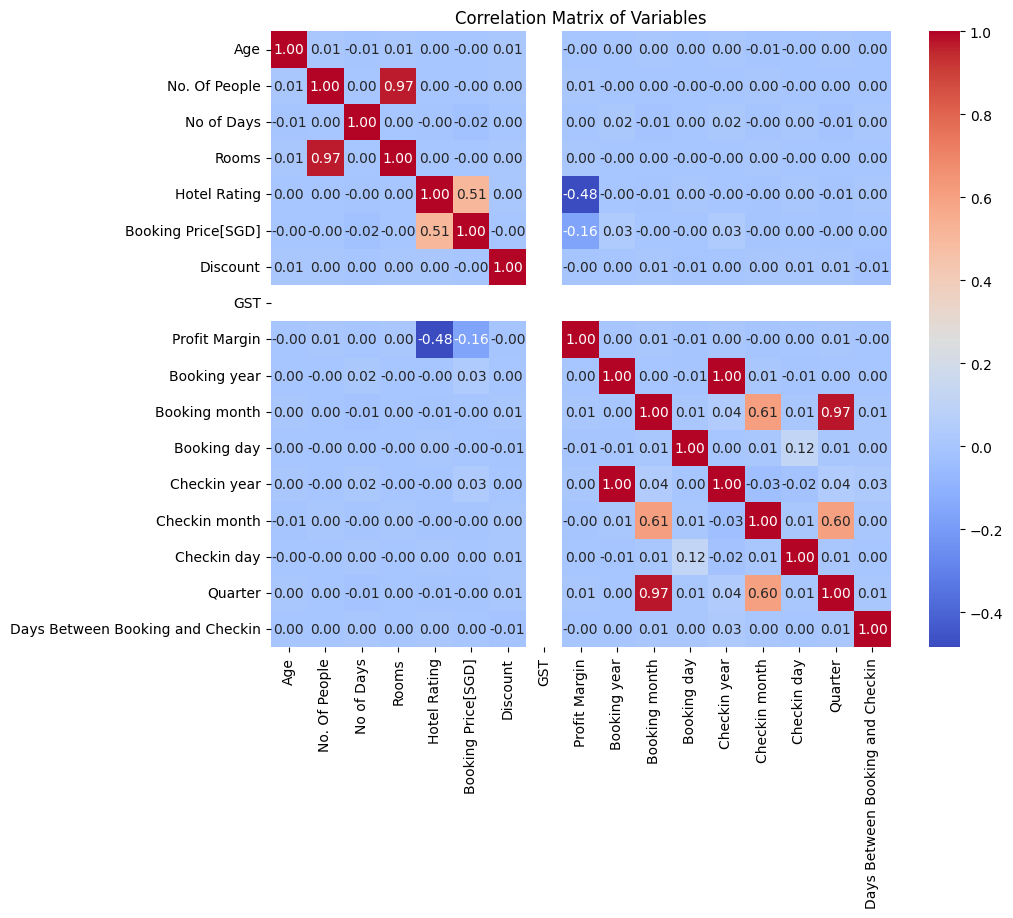

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

This chart was to see the correlation between all the variables in the dataset.

# **Recommendations**

Based on our analysis above, we can make the following recommendations:

1. The company can offer higher discount on more rooms to entice people to book more. For instance, in one of our charts, it could be seen that a travelling party with 1-2 people tend to book single rooms, and those travelling with 3-6 people book 2-3 rooms.
2. Since majority of the customer tend to book up to 20 days before their check-in date, advertisements can be made weeks before holidays to coerce early birds. Special perks and good copywriting can be combined to give people the impression that they will be gaining more by booking early.
3. Based on the decreasing profit margin, the company will need to review their prices to reflect current economic realities.
4. Targeted marketing campaigns can aslo be made in countries like Cambodia with low patronage to improve the number of bookings.
5. The company should increase advertisements in quarter one, two and three as it is their busiest seasons.